<a href="https://colab.research.google.com/github/web4myself/ml-projects/blob/main/diabetes_prediction_using_ML(svm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUPPORT VECTOR MACHINES

It is an important supervised machine learning algorithm :)


The SVM model is a supervised machine learning model that is mainly used for classifications (but it could also be used for regression!). It learns how to separate different groups by forming decision boundaries.



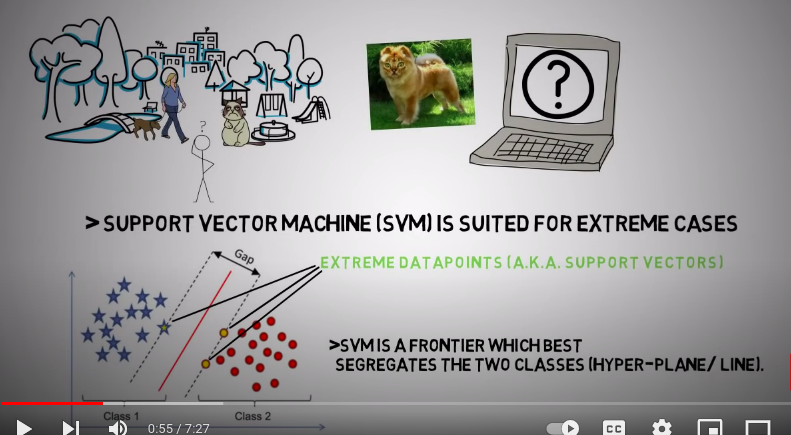

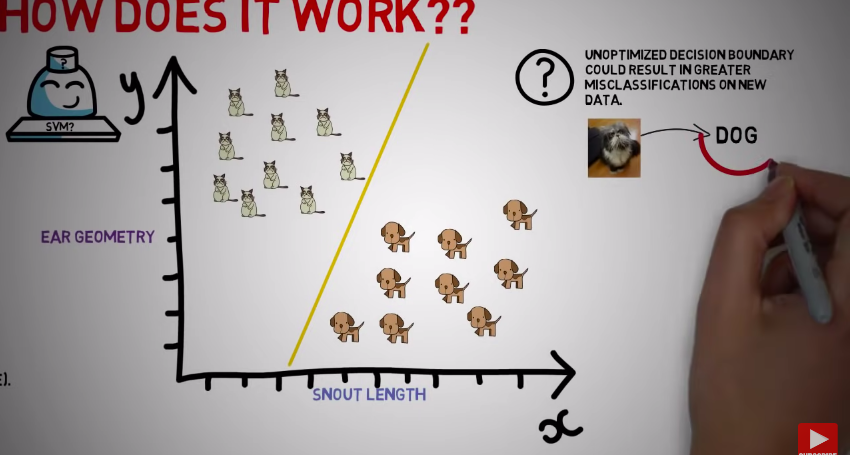

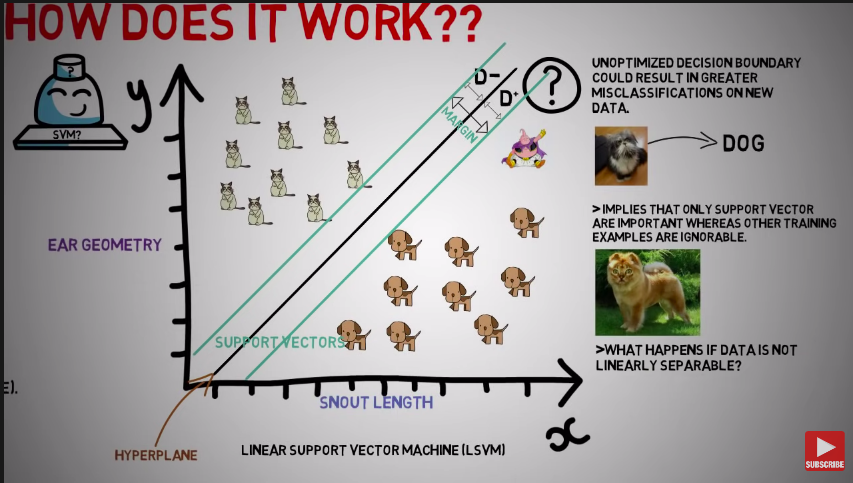

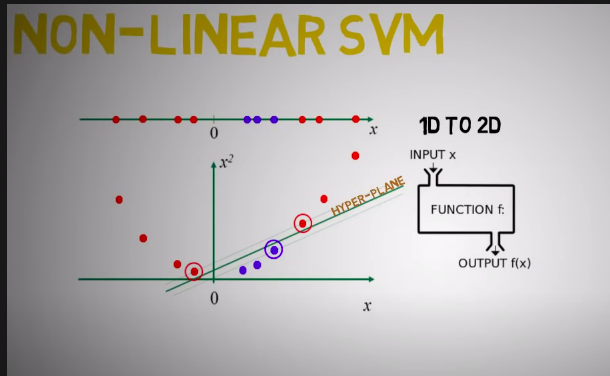

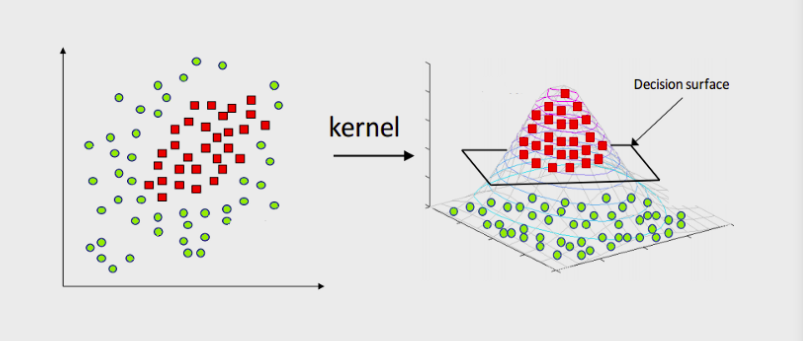

As you can see in the above picture, if we find a way to map the data from 2-dimensional space to 3-dimensional space, we will be able to find a decision surface that clearly divides between different classes. My first thought of this data transformation process is to map all the data point to a higher dimension (in this case, 3 dimension), find the boundary, and make the classification.




That sounds alright. However, when there are more and more dimensions, computations within that space become more and more expensive. This is when the kernel trick comes in. It allows us to operate in the original feature space without computing the coordinates of the data in a higher dimensional space.

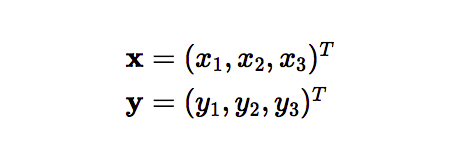

Here x and y are two data points in 3 dimensions. Let’s assume that we need to map x and y to 9-dimensional space. We need to do the following calculations to get the final result, which is just a scalar. The computational complexity, in this case, is O(n²).


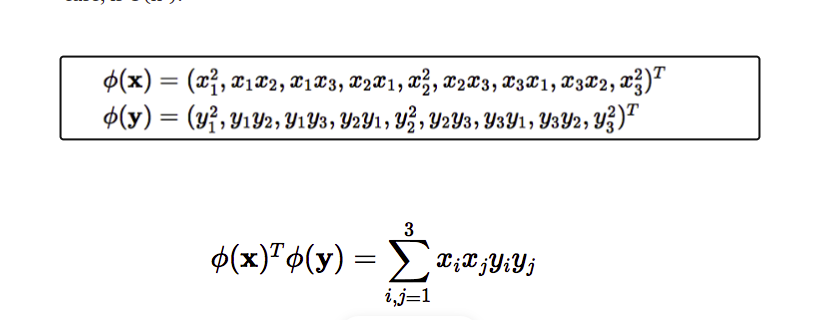


However, if we use the kernel function, which is denoted as k(x, y), instead of doing the complicated computations in the 9-dimensional space, we reach the same result within the 3-dimensional space by calculating the dot product of x -transpose and y. The computational complexity, in this case, is O(n).







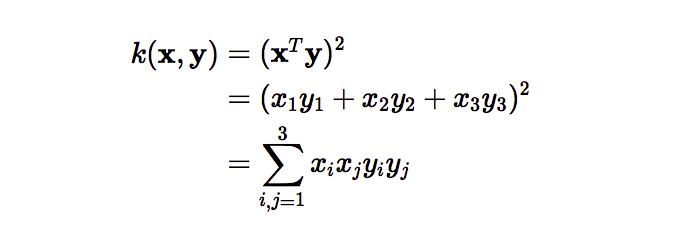

In essence, what the kernel trick does for us is to offer a more efficient and less expensive way to transform data into higher dimensions. With that saying, the application of the kernel trick is not limited to the SVM algorithm. Any computations involving the dot products (x, y) can utilize the kernel trick.

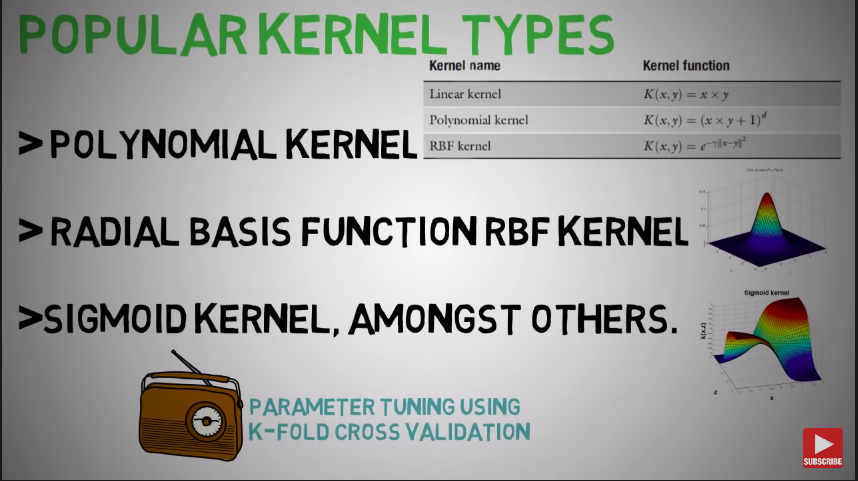

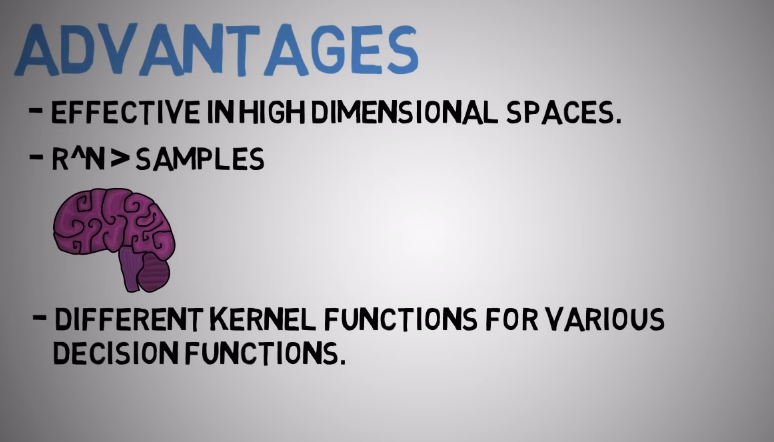

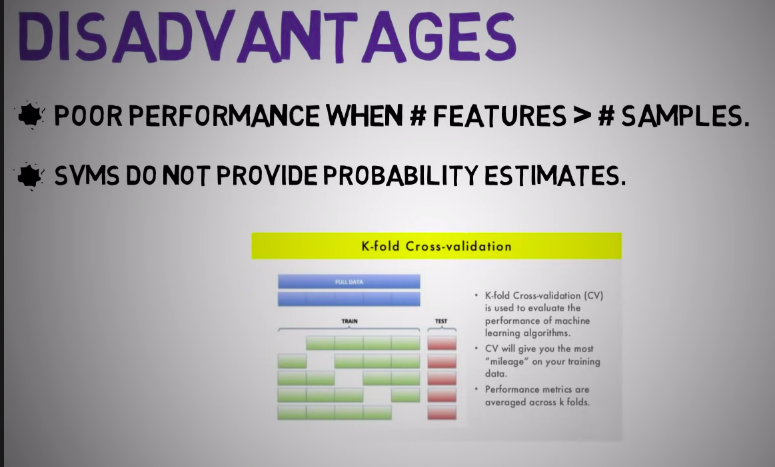

### applications

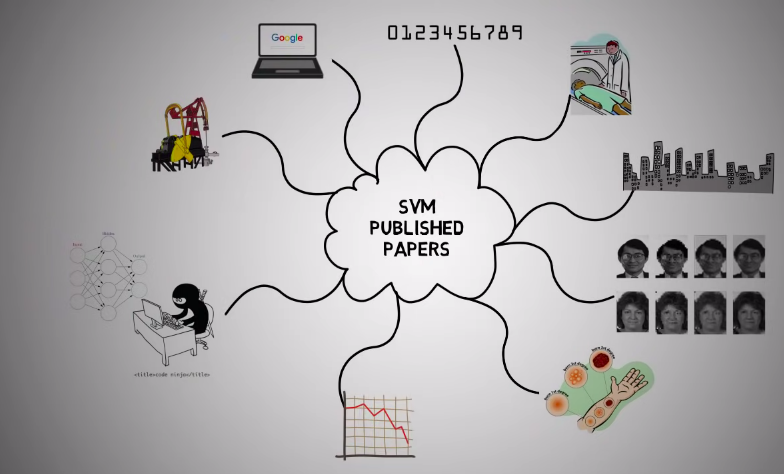

# Work Flow

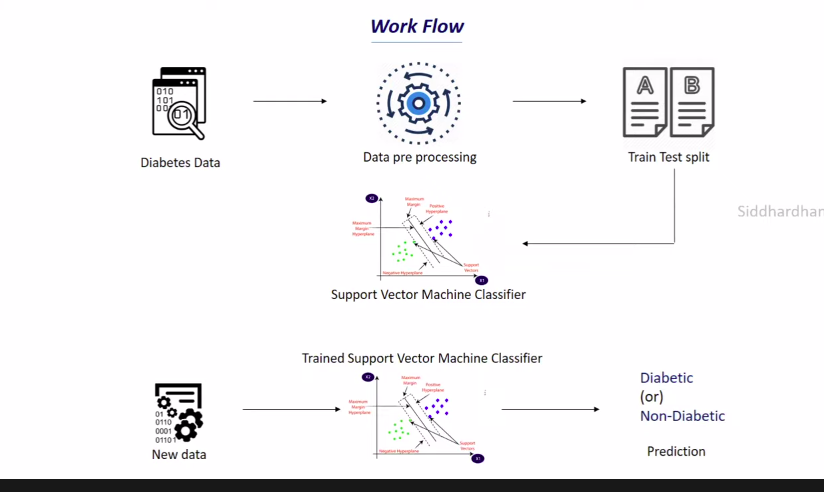

imoprting Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

data collection and analysis

In [ ]:
#PIMA diabetes data set only female patients
diabetes_dataset=pd.read_csv("/content/diabetes.csv")
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pd.read_csv?

In [ ]:
diabetes_dataset. #768 people

(768, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#the machine learning algorithm predicts the value of output on the basis of statitical parameters
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
x=diabetes_dataset.drop(columns='Outcome',axis=1)
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
y=diabetes_dataset['Outcome']
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
